In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_sz = pd.read_csv('data/sz-daily-2015.csv')
df_sz.index = pd.to_datetime(df_sz.date)
df_sz.drop('date', axis=1, inplace=True)

In [3]:
df_sz.head()

,mean_temp,max_temp,min_temp,humidity,mean_wspeed,max_wspeed,wdegree,pressure,rainfall,radiation,radiation_balance,uva,uvb,no,no2,ozone,PM10,PM2_5
date,,,,,,,,,,,,,,,,,,
2015-01-01,1.9,3.3,0.4,89.4,1.4,5.4,190.3,1003.0,0.00,10.8,-3.9,2.23,0.036,21,27,13.0,96.0,87.0
2015-01-02,3.2,6.0,-0.9,80.1,1.8,8.5,234.6,999.4,1.00,8.0,-36.4,2.21,0.038,10,36,16.0,11.0,9.0
2015-01-03,3.9,11.2,0.8,88.3,2.0,15.3,228.4,992.8,11.97,11.4,-24.7,3.00,0.061,18,35,12.0,9.0,8.0
2015-01-04,3.6,5.4,2.1,72.9,2.1,10.2,272.6,998.5,0.00,33.6,-14.1,4.01,0.079,4,17,31.0,8.0,5.0
2015-01-05,2.7,8.2,-0.1,66.6,1.5,4.5,208.3,1001.0,0.00,61.1,-35.8,5.17,0.103,52,50,10.0,16.0,11.0


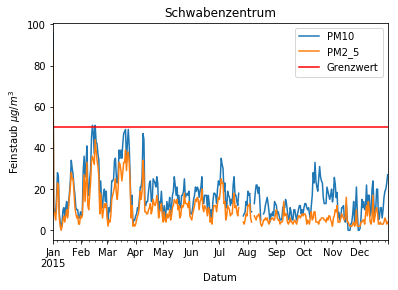

In [4]:
df_sz.PM10.plot()
df_sz.PM2_5.plot()
plt.axhline(y=50, color='r', label='Grenzwert')
plt.xlabel('Datum')
plt.ylabel('Feinstaub $\mu g / m^3$')
plt.legend()
_ = plt.title('Schwabenzentrum')

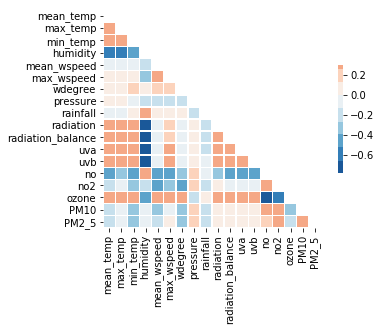

In [5]:
corr = df_sz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("RdBu_r", 12)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

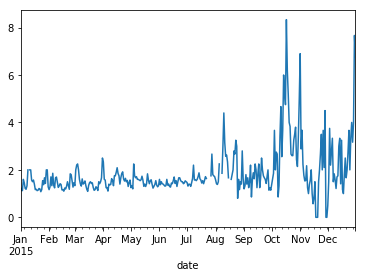

In [6]:
pm_ratio = df_sz.PM10 / df_sz.PM2_5
pm_ratio.plot();

In [7]:
tage = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
df_sz.PM10.groupby(df_sz.index.dayofweek).agg(['min','mean', 'median', 'max'])

,min,mean,median,max
date,,,,
0,0.0,15.692157,14.0,51.0
1,1.0,16.917308,14.0,49.0
2,0.0,16.873077,14.5,42.0
3,0.0,18.939216,15.9,96.0
4,0.0,17.948000,16.5,51.0
5,1.0,15.905882,14.0,49.0
6,0.0,14.590000,13.0,37.0


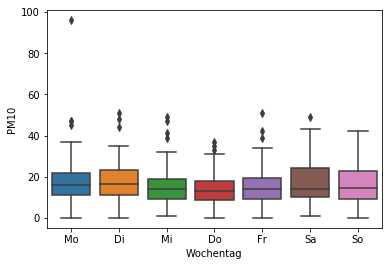

In [8]:
ax = sns.boxplot(x=df_sz.index.weekday_name, y='PM10', data=df_sz)
ax.set_xticklabels(tage)
plt.xlabel('Wochentag');

In [9]:
df_nt = pd.read_csv('data/neckartor-daily-2016.csv')
df_nt.index = pd.to_datetime(df_nt.date)
df_nt.drop('date', axis=1, inplace=True)

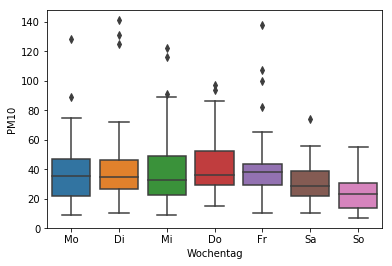

In [10]:
ax = sns.boxplot(x=df_nt.index.dayofweek, y='PM10', data=df_nt)
ax.set_xticklabels(tage);
plt.xlabel('Wochentag');